In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# importing required packages
import re
import pandas as pd
import numpy as np
from PIL import Image

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from wordcloud import WordCloud

In [33]:
# reading the dataset and loading into a dataframe
df = pd.read_csv('../data/data.csv')

# printing the shape: (rows, columns)
display(df.shape)

# first 5 datapoints
display(df.head())

# 5 random samples
display(df.sample(5))

(5322, 2)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


,Sentence,Sentiment
3919,longed $AMZN 300 @ 189.82,positive
739,Last year SysOpen Digia invested in IBM produc...,positive
2922,Operators only need to learn how to use one de...,neutral
4867,Rautaruukki Corporation Stock exchange release...,positive
5609,"The 10,000-odd square metre plot that Stockman...",neutral


neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


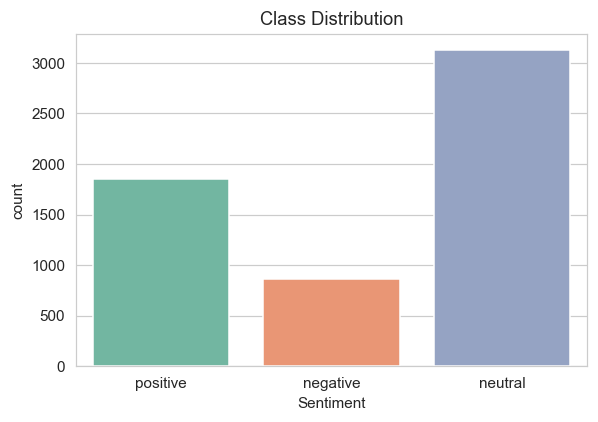

In [5]:
# distribution of datapoints by class labels
print(df['Sentiment'].value_counts())

# plotting the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Sentiment')
plt.show()

In [6]:
# finding duplicate sentences
df[df['Sentence'].duplicated()]

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [7]:
# extracting indices of duplicate sentences
duplicate_indices = df[df['Sentence'].duplicated()].index.to_list()

dup_df = None

# extracting each set of duplicate sentences
for index in duplicate_indices:
    dup_df = pd.concat([dup_df, df[df['Sentence'] == df['Sentence'].loc[index]]])

dup_df

,Sentence,Sentiment
66,Finnish GeoSentric 's net sales decreased to E...,negative
266,Finnish GeoSentric 's net sales decreased to E...,neutral
163,Sales in Finland decreased by 10.5 % in Januar...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
195,Full-year operating result for 2008 was 3.6 mi...,neutral
...,...,...
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
1860,RISING costs have forced packaging producer Hu...,neutral
5837,RISING costs have forced packaging producer Hu...,negative
186,"In the building and home improvement trade , s...",negative


In [8]:
# dropping the duplicate sentences with "neutral" sentiment
for index in duplicate_indices:
    temp = df[df['Sentence'] == df['Sentence'].loc[index]]
    dup_idx = temp[temp['Sentiment'] == 'neutral'].index[0]
    df = df.drop(index=dup_idx)

# resetting the index
df.reset_index()
    
# verifying if duplicate sentences are dropped
df[df['Sentence'].duplicated()]

,Sentence,Sentiment


neutral     2610
positive    1852
negative     860
Name: Sentiment, dtype: int64


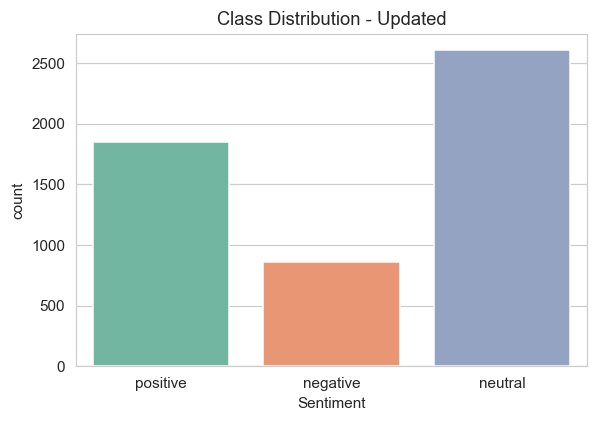

In [9]:
# updated distribution of datapoints by class labels
print(df['Sentiment'].value_counts())

# plotting the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution - Updated')
axes.set_xlabel('Sentiment')
plt.show()

In [10]:
# counting null values in the dataset
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [34]:
# splitting into train-validation-test sets (60-20-20)
# performing a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Sentiment'])

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42, stratify=df_train['Sentiment'])

# rest index
df_train.reset_index()
df_valid.reset_index()
df_test.reset_index()

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('valid:',df_valid.shape[0])
print('test:',df_test.shape[0])

# saving validation set
df_valid.to_csv('../data/valid_data.csv', index=False)

# saving test set
df_test.to_csv('../data/test_data.csv', index=False)

train: 3192
valid: 1065
test: 1065


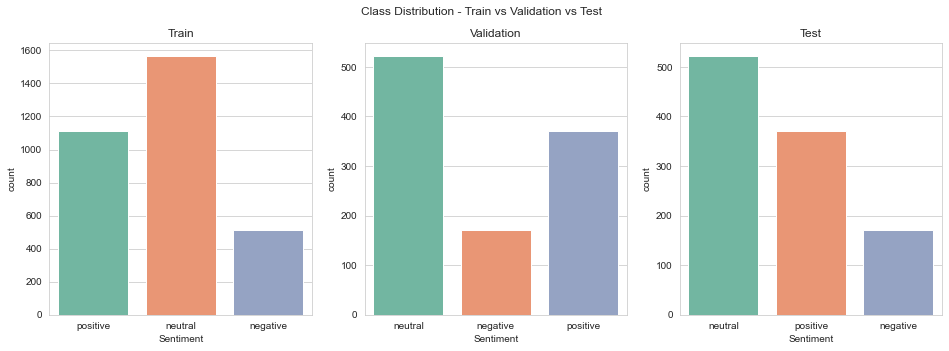

In [35]:
# plotting class distribution for train and test sets
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,5))
fig.suptitle('Class Distribution - Train vs Validation vs Test')

chart = sns.countplot(x="Sentiment", data=df_train, palette="Set2", ax=ax1)
axes = chart.axes
axes.set_title('Train')
axes.set_xlabel('Sentiment')

chart = sns.countplot(x="Sentiment", data=df_valid, palette="Set2", ax=ax2)
axes = chart.axes
axes.set_title('Validation')
axes.set_xlabel('Sentiment')

chart = sns.countplot(x="Sentiment", data=df_test, palette="Set2", ax=ax3)
axes = chart.axes
axes.set_title('Test')
axes.set_xlabel('Sentiment')
plt.show()

In [15]:
# spawning a word lemmatizer
lemma = WordNetLemmatizer()

# loading all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [24]:
## defining the cleaning and preprocessing actions
# converting text to lowercase
# removing links
# coverting text into tokens
# removing stop words
# lemmatizing all words
# removing all words with length less than 3
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [27]:
# cleaning and preprocessing the tweet_text column
df_train['clean_sentence'] = df['Sentence'].apply(clean_text)

display(df_train.loc[:,['Sentence', 'clean_sentence']].head())

,Sentence,clean_sentence
4257,"Last week , however , Nokia announced that it ...",last week however nokia announced pursue long ...
3800,"Supported Nokia phones include : N96 , N95-8GB...",supported nokia phone include touch xpress cla...
5146,The bank forecasts Finland 's GDP will grow by...,bank forecast finland gdp grow
4503,Why $MCD looks set to fall further. http://stk...,mcd look set fall
3068,According to Finnish petrol station chain St1 ...,according finnish petrol station chain managin...


In [28]:
# clean training dataset
df_train_cleaned = df_train.loc[:,['clean_sentence', 'Sentiment']]

# saving the cleaned training data
df_train_cleaned.to_csv('../data/train_data.csv', index=False)

display(df_train_cleaned.sample(10))

,clean_sentence,Sentiment
1712,virala allocated board director amount eur mil...,neutral
4221,gte long,positive
165,nordea cheapest also couple debt,neutral
2583,operating profit rose eur eur corresponding pe...,positive
940,affecto expects net sale whole increase level ...,positive
3297,market expecting poor performance company stoc...,positive
1480,llc voice data management solution provider wi...,neutral
3160,year dividend deducted subscription price,neutral
578,much better process using virgin paper require...,positive
3231,superior customer centricity expertise digital...,positive


## WordCloud: All sentences
----

In [30]:
# creating a mask for wordcloud
# twitter_mask = np.array(Image.open('../images/logo1.png'))
# plt.axis('off')
# plt.imshow(twitter_mask)
# plt.show()

colormap = 'Set2'

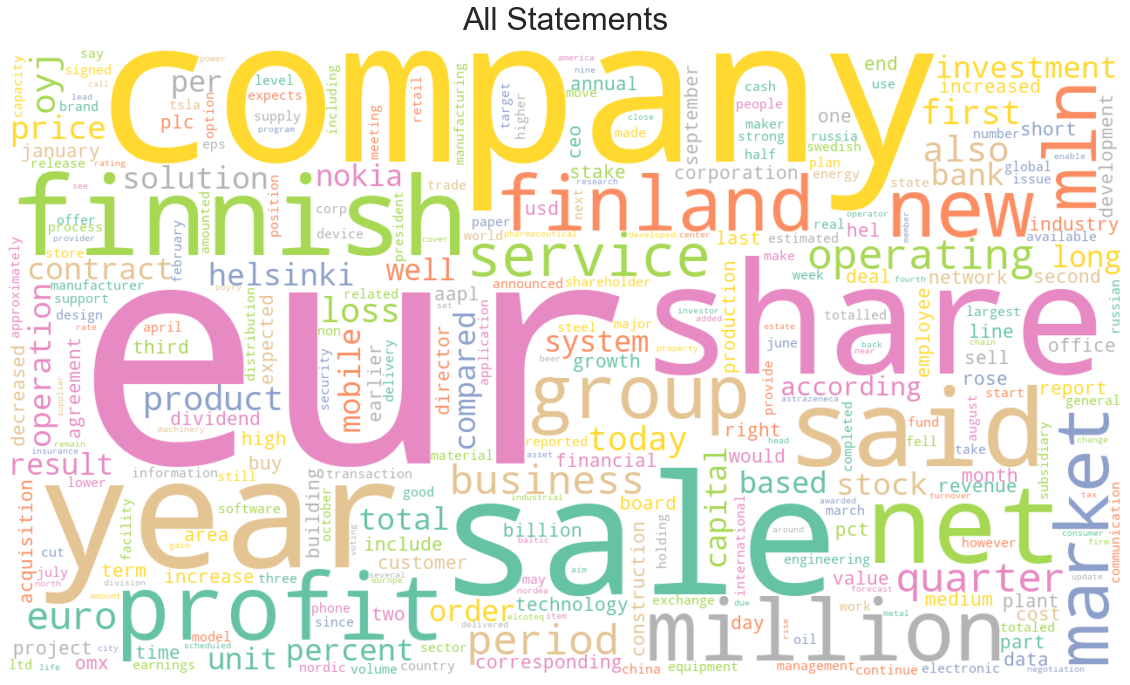

In [32]:
# wordcloud for all statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train.clean_sentence)))

plt.axis('off')
plt.title('All Statements', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-not-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()